<a href="https://colab.research.google.com/github/anishkudupudi/Deepfake_Face_Detection/blob/main/final_program/workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RvF - Starter Code Workbook

This is a workbook that you can upload to Google Colab to work on the project. It will download all the correct files and details to work on model development and improving.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Change this to the folder containing your Kaggle API key (kaggle.json)
%env KAGGLE_KEY_FOLDER=MDST/
!mkdir data
!export KAGGLE_CONFIG_DIR=/content/drive/MyDrive/$KAGGLE_KEY_FOLDER && wget -O - "https://raw.githubusercontent.com/MichiganDataScienceTeam/W24-RvF/main/data/download.sh" | bash -s rvf5k

Streaming output truncated to the last 5000 lines.
  inflating: data/rvf5k/rvf5k/train/fake/0295XVJX3G.jpg  
  inflating: data/rvf5k/rvf5k/train/fake/02P5FJ8I1D.jpg  
  inflating: data/rvf5k/rvf5k/train/fake/02S9HYYXM0.jpg  
  inflating: data/rvf5k/rvf5k/train/fake/03ICKBS17S.jpg  
  inflating: data/rvf5k/rvf5k/train/fake/03OOX8FLWL.jpg  
  inflating: data/rvf5k/rvf5k/train/fake/04EZNAOPFJ.jpg  
  inflating: data/rvf5k/rvf5k/train/fake/0520AQG56S.jpg  
  inflating: data/rvf5k/rvf5k/train/fake/06A30XHW61.jpg  
  inflating: data/rvf5k/rvf5k/train/fake/06N8AFCAWP.jpg  
  inflating: data/rvf5k/rvf5k/train/fake/07RHYTLQLS.jpg  
  inflating: data/rvf5k/rvf5k/train/fake/080F8GRIC6.jpg  
  inflating: data/rvf5k/rvf5k/train/fake/094EC3AL8F.jpg  
  inflating: data/rvf5k/rvf5k/train/fake/09L5LZJJ3C.jpg  
  inflating: data/rvf5k/rvf5k/train/fake/0AOS90ACZ0.jpg  
  inflating: data/rvf5k/rvf5k/train/fake/0AQEWAAR2I.jpg  
  inflating: data/rvf5k/rvf5k/train/fake/0DL4GN5H8P.jpg  
  inflating: data/rvf

In [ ]:
!rm -R starter_code
!git clone -q https://github.com/MichiganDataScienceTeam/W24-RvF.git
!mv W24-RvF/starter_code .
!rm -r W24-RvF

rm: cannot remove 'starter_code': No such file or directory


In [ ]:
!ls
!ls data/rvf5k/

data  drive  sample_data  starter_code
rvf5000.zip  train  train.csv  valid  valid.csv


**KEY**: Make sure to save your work after every meeting! We recommend you do so via GitHub, but its not necessary.

The following sample code is the basics you need to get started with model development.

In [ ]:
import torch
import torchvision
import cv2
import torchvision.transforms.v2 as v2
from model.dataset import RvFDataset, get_loaders
from model.train import train_model, plot_performance, load_model

In [ ]:
train_dataset = RvFDataset("train", data_directory = "data/rvf5k")

mean = torch.zeros((3,))
variance = torch.zeros((3,))
tensor_converter = v2.ToTensor()

for image, _ in train_dataset:
    mean += tensor_converter(image).mean(dim=(1, 2))
    mean /= len(train_dataset)
for image, _ in train_dataset:
    image = tensor_converter(image)
    variance += ((image - mean.view(3, 1, 1))**2).mean(dim=(1,2))

std = torch.sqrt(variance / len(train_dataset))

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [ ]:
def preprocess(image) -> torch.Tensor:
    """
    Preprocesses an image by applying a series of transformation.

    Args:
        image (npt.ArrayLike): The input image to be preprocessed.

    Returns:
        torch.Tensor: The preprocessed image as a tensor.
    """

    tensor = torch.tensor(image, dtype = torch.float32).permute(2, 0, 1)
    tight = torch.from_numpy(cv2.Canny(image, 118, 128)).view(1, 256, 256) # Edge.
    tensor = v2.Normalize(mean = mean, std = std)(tensor)
    tensor =  v2.ColorJitter(brightness=.5, hue=.3)(tensor) # Color.
    tensor = v2.GaussianBlur(kernel_size = (5, 9), sigma = (0.1, 5.))(tensor) # Blur.
    tensor = torch.dstack([tensor.permute(1, 2, 0), tight.permute(1, 2, 0)]).permute(2, 0, 1)
    return tensor

    #mean = torch.zeros((3,))
    #variance = torch.zeros((3,))
    #tensor_converter = v2.ToTensor()

    #for image, _ in train_dataset:
    #    mean += tensor_converter(image).mean(dim=(1, 2))
    #    mean /= len(train_dataset)
    #for image, _ in train_dataset:
    #    image = tensor_converter(image)
    #    variance += ((image - mean.view(3, 1, 1))**2).mean(dim=(1,2))

    #std = torch.sqrt(variance / len(train_dataset))
    # TODO: Edit this function to more preprocessing steps to improve model performance.
    #tight = torch.from_numpy(cv2.Canny(image.permute(1,2,0).numpy(), 240, 250)).view(1, 500, 500)
    #return torch.dstack([image, tight]) # Add an extra channel for edges


    #tensor_converter = v2.Compose([ # Step 0: Convert from PIL Image to Torch Tensor
    #    v2.ToImage(),
    #    v2.ToDtype(torch.float32, scale=True)
    #])
    #normalizer = v2.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2532, 0.2496, 0.2681]) # Step 1. Normalize the image
    #cropper = v2.RandomCrop(size=(28, 28))
    #blurrer = v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.))

    #preprocessor = v2.Compose([
    #tensor_converter,
    #normalizer,
    #cropper,
    #blurrer])
    #tensor = torch.tensor(image, dtype=torch.float32)
    #return tensor.permute(2,0,1)


In [ ]:
from torch import nn
class Model(torch.nn.Module):
    def __init__(self):
      """Constructor for the neural network."""
      super(Model, self).__init__()        # Call superclass constructor
      self.batchnorm = torch.nn.BatchNorm2d(num_features = 4)
      self.padding = torch.nn.ZeroPad2d(padding = 2)
      self.conv1 = torch.nn.Conv2d(in_channels = 4, out_channels = 16, kernel_size = 3, stride = 1)
      self.dropout = torch.nn.Dropout(p = 0.05)
      self.conv2 = torch.nn.Conv2d(in_channels = 16, out_channels = 128, kernel_size = 3, stride = 1)
      self.pool = torch.nn.MaxPool2d(kernel_size = 2, stride = 2)
      self.relu = torch.nn.ReLU()
      self.flatten = torch.nn.Flatten()
      self.fc = torch.nn.Linear(540800, 10)

    def forward(self, x):
      b1 = self.batchnorm(x)
      pa1 = self.padding(b1)

      z1 = self.conv1(pa1)
      d1 = self.dropout(z1)
      h1 = self.relu(d1)
      p1 = self.pool(h1)

      pa2 = self.padding(p1)

      z2 = self.conv2(pa2)
      d2 = self.dropout(z2)
      h2 = self.relu(d2)
      p2 = self.pool(h2)

      flat = self.flatten(p2)
      z = self.fc(flat)

      return z
    pass

data  drive  kernelsanders.pt  sample_data  starter_code


Batch Accuracy: 0.84 , Total Accuracy: 0.85: 100%|██████████| 125/125 [15:54<00:00,  7.64s/it]


Epoch 1: Loss - (Train 43.74/Val 0.01), Accuracy - (Train 0.85/Val 0.85)


Batch Accuracy: 0.81 , Total Accuracy: 0.90: 100%|██████████| 125/125 [15:52<00:00,  7.62s/it]


Epoch 2: Loss - (Train 31.04/Val 0.01), Accuracy - (Train 0.90/Val 0.84)


Batch Accuracy: 0.94 , Total Accuracy: 0.93: 100%|██████████| 125/125 [16:14<00:00,  7.79s/it]


Epoch 3: Loss - (Train 21.17/Val 0.02), Accuracy - (Train 0.93/Val 0.82)


Batch Accuracy: 0.94 , Total Accuracy: 0.97: 100%|██████████| 125/125 [16:09<00:00,  7.75s/it]


Epoch 4: Loss - (Train 10.25/Val 0.02), Accuracy - (Train 0.97/Val 0.81)


Batch Accuracy: 1.00 , Total Accuracy: 0.98: 100%|██████████| 125/125 [16:33<00:00,  7.95s/it]


Epoch 5: Loss - (Train 6.16/Val 0.03), Accuracy - (Train 0.98/Val 0.81)


' model = Model()\noptimizer = torch.optim.Adam(model.parameters(), lr=1e-3) # TODO: Change the optimizer to explore different options\ncriterion = torch.nn.CrossEntropyLoss() # TODO: Change the criterion to explore different options\n\nhistory = train_model(model, criterion, optimizer, train_loader, val_loader, epochs=5)\nplot_performance(history)\n\n# Load the model from the training run\nload_model(model, "checkpoints", 0) # change epoch from 0 to something else '

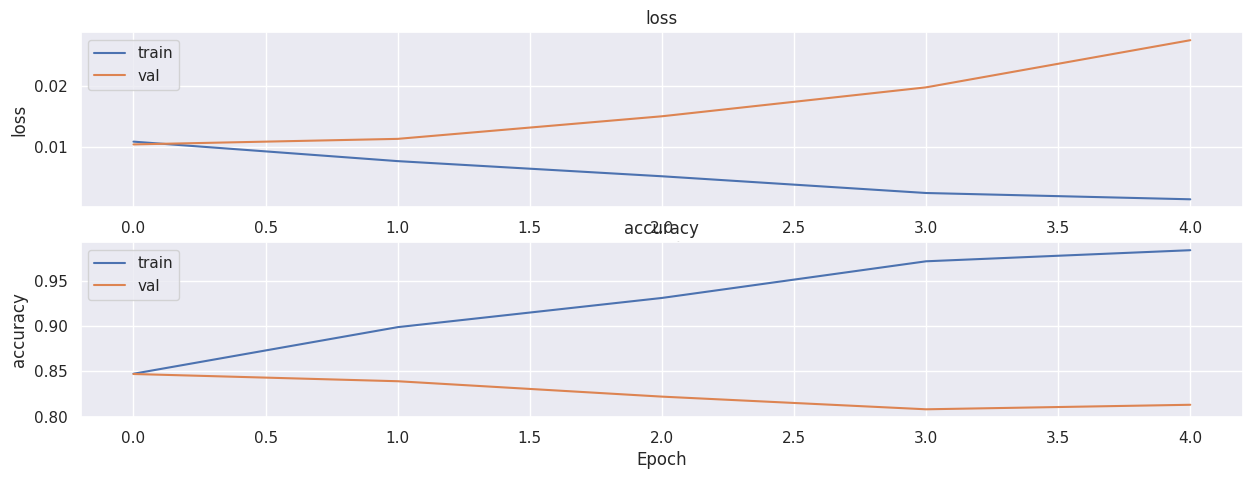

In [ ]:
from model.dataset import get_loaders
from model.train import train_model, plot_performance, load_model


train_loader, val_loader = get_loaders(preprocessor = preprocess, data_directory = "data/rvf5k")

model = Model()
wmodel = torch.load('kernelsanders.pt')
model.load_state_dict(wmodel)
!ls

optimizer = torch.optim.Adam(model.parameters(), lr = 5e-3) # TODO: Change the optimizer to explore different options
criterion = torch.nn.CrossEntropyLoss() # TODO: Change the criterion to explore different options

history = train_model(model, criterion, optimizer, train_loader, val_loader, epochs = 5)
plot_performance(history)

# Load the model from the training run
load_model(model, "checkpoints", 4) # change epoch from 0 to something else


''' model = Model()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) # TODO: Change the optimizer to explore different options
criterion = torch.nn.CrossEntropyLoss() # TODO: Change the criterion to explore different options

history = train_model(model, criterion, optimizer, train_loader, val_loader, epochs=5)
plot_performance(history)

# Load the model from the training run
load_model(model, "checkpoints", 0) # change epoch from 0 to something else '''

**KEY**: At the end of each work session, submit this workbook via slack! This will allow the project leads to train your model on the larger 140k dataset over the week!